In [7]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import sys
sys.path.append("../")
from LocalLinearForest import LocalLinearForest
%load_ext autoreload
%autoreload 2
%matplotlib inline
np.random.seed(40)
f = lambda x: np.log(1 + np.exp(6 * x)) + np.random.normal(0, 0.5, x.shape)
f0 = lambda x: np.log(1 + np.exp(6 * x))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Oridnary RFG by sklearn

In [8]:
from sklearn.ensemble import RandomForestRegressor 

x = np.arange(-1, 1, 0.01)
y_true = f0(x)
y = f(x)

## Normal random forest regressor fitting
skr_1 = RandomForestRegressor(n_estimators=100, max_depth=3)
skr_1.fit(x.reshape(-1, 1), y)
y_pred = skr_1.predict(x.reshape(-1, 1))

## Local Linear Forest 

/home/jingbo/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


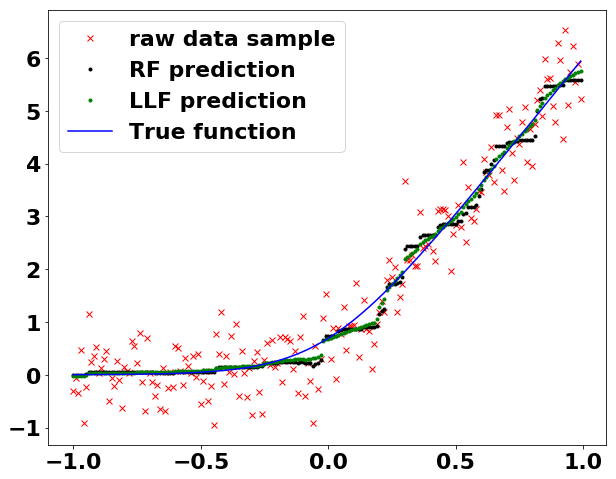

In [11]:
llf_1 = LocalLinearForest(n_estimators=100, max_depth=3)
llf_1.fit(x.reshape(-1, 1), y)
x0s = np.arange(-1, 1, 0.01)
y0_pred = llf_1.predict(x0s.reshape(-1, 1))




font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)
plt.figure(figsize=(10, 8))
plt.plot(x, y, "rx", label="raw data sample")
plt.plot(x, y_pred, "k.", label="RF prediction")
plt.plot(x0s, y0_pred, "g.", label="LLF prediction")
plt.plot(x, y_true, "b", label="True function")
plt.legend()